# Assignment 2(due on 11/08)

## Student:张元新（12331318），Gtihub：CingyQ

## 批改人：吴昊天

## 得分：49/50

### PS1. Significant earthquakes since 2150 B.C.

In [1]:
#1.1 [5 points] Compute the total number of deaths caused by earthquakes since 2150 B.C. in each country, and then print the top ten countries along with the total number of deaths.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Sig_Eqs = pd.read_csv('data\earthquakes-2023-10-27_16-26-40_+0800.tsv', sep='\t')


In [2]:
#1.1 [5 points] Compute the total number of deaths caused by earthquakes since 2150 B.C. in each country, and then print the top ten countries along with the total number of deaths.

num_deaths = Sig_Eqs.groupby('Country')['Deaths'].sum()
num_deaths = num_deaths.sort_values(ascending=False)
print(num_deaths.head(10))


Country
CHINA         2075045.0
TURKEY        1188881.0
IRAN          1011449.0
ITALY          498478.0
SYRIA          439224.0
HAITI          323478.0
AZERBAIJAN     317219.0
JAPAN          279085.0
ARMENIA        191890.0
PAKISTAN       145083.0
Name: Deaths, dtype: float64


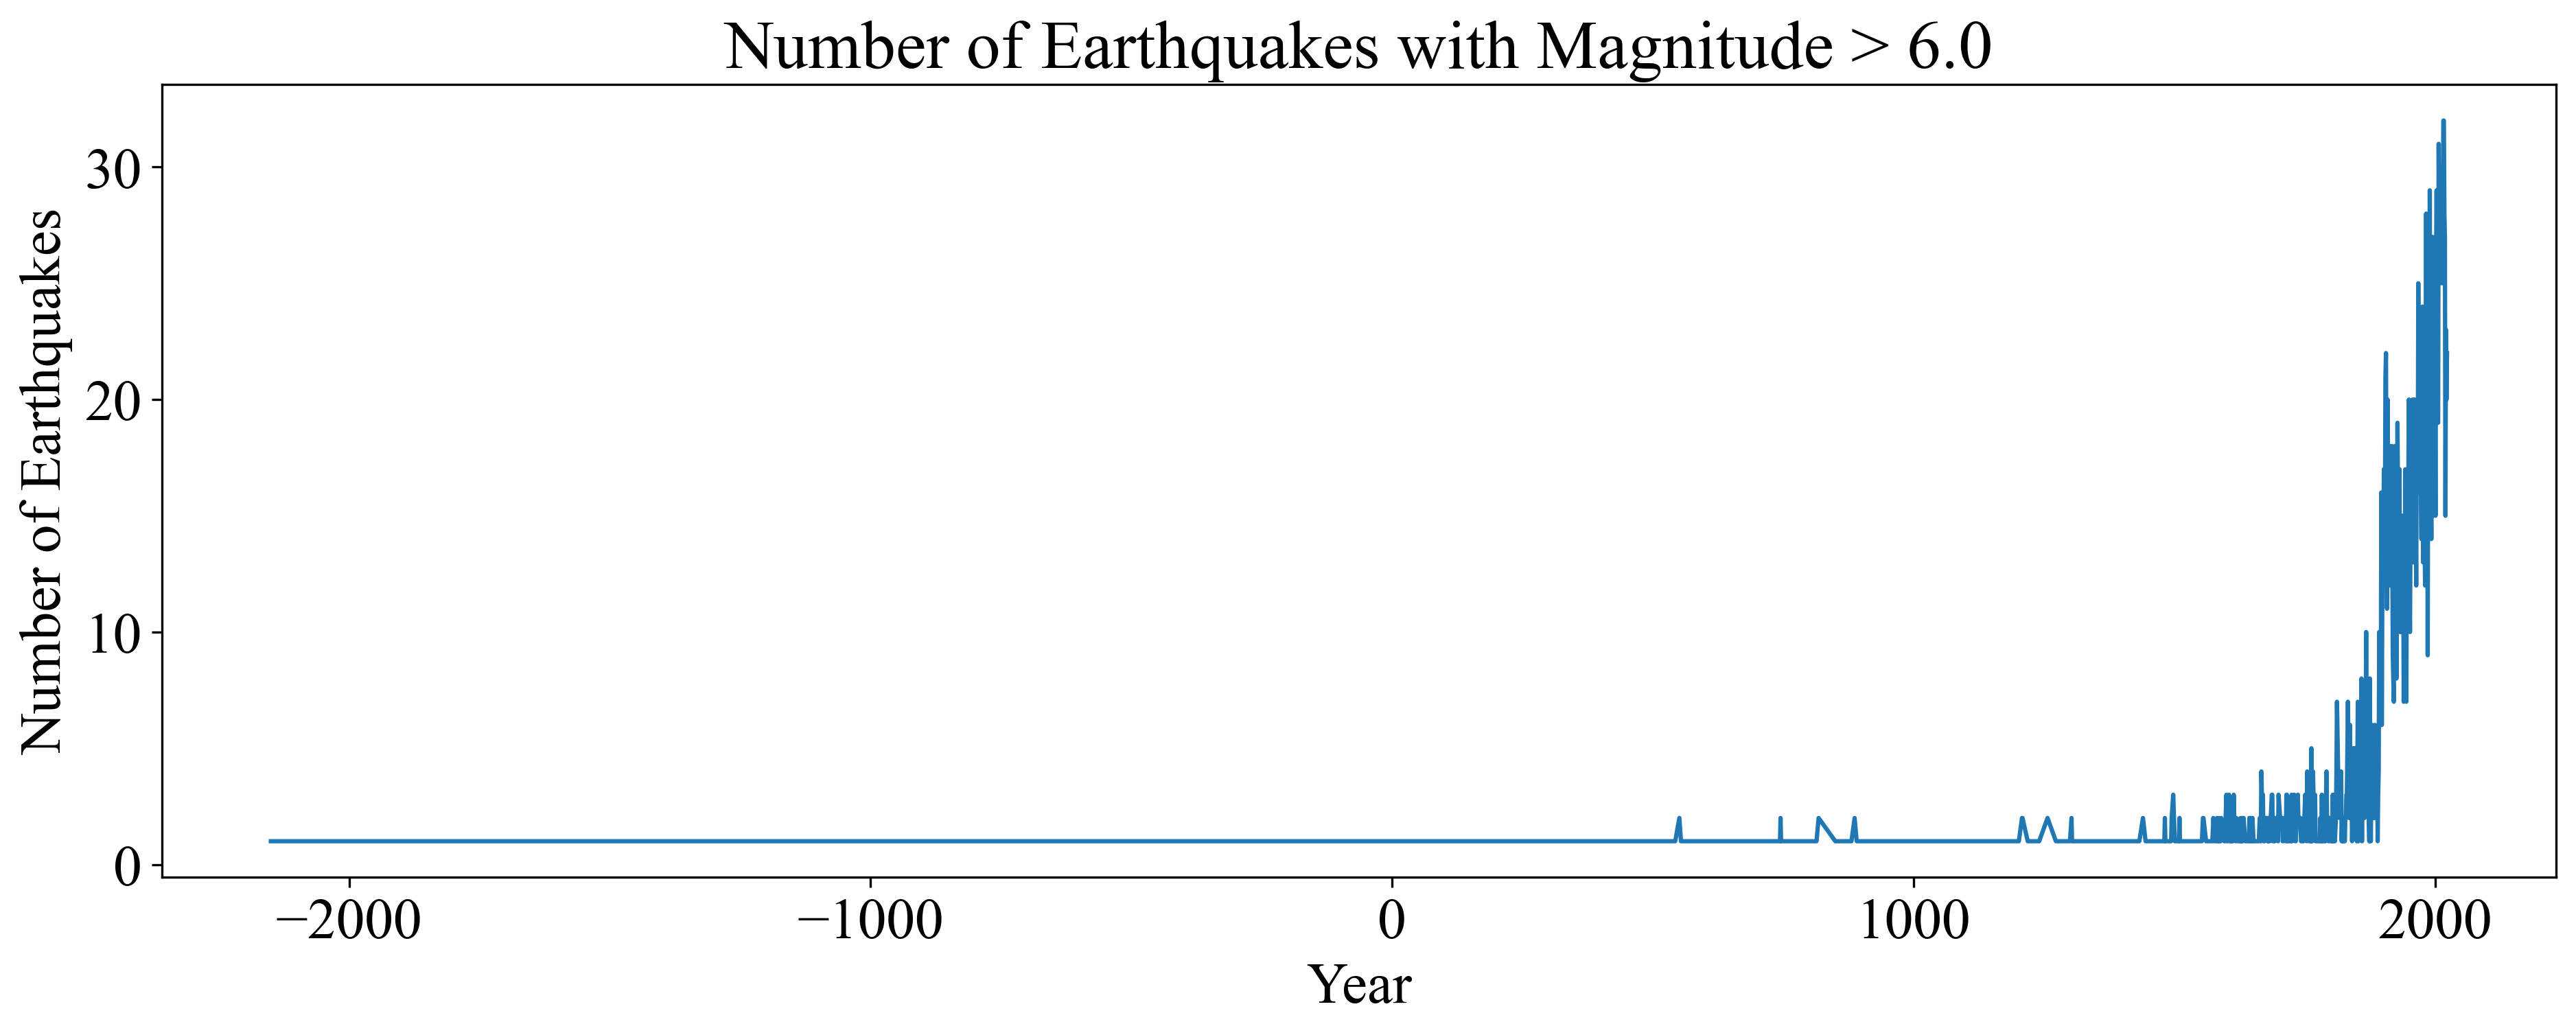

In [3]:
#Compute the total number of earthquakes with magnitude larger than 6.0 (use column Mag as the magnitude) worldwide each year, 
# and then plot the time series.
mag_6 = Sig_Eqs[Sig_Eqs['Mag'] > 6.0]
mag_6 = mag_6.groupby('Year')['Mag'].count()
#字体使用新罗马，字号20
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 20
plt.figure(figsize=(15,5), dpi=300)
mag_6.plot()
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.title('Number of Earthquakes with Magnitude > 6.0')
plt.show()



(-2250.0, 2023.0)

<Figure size 640x480 with 0 Axes>

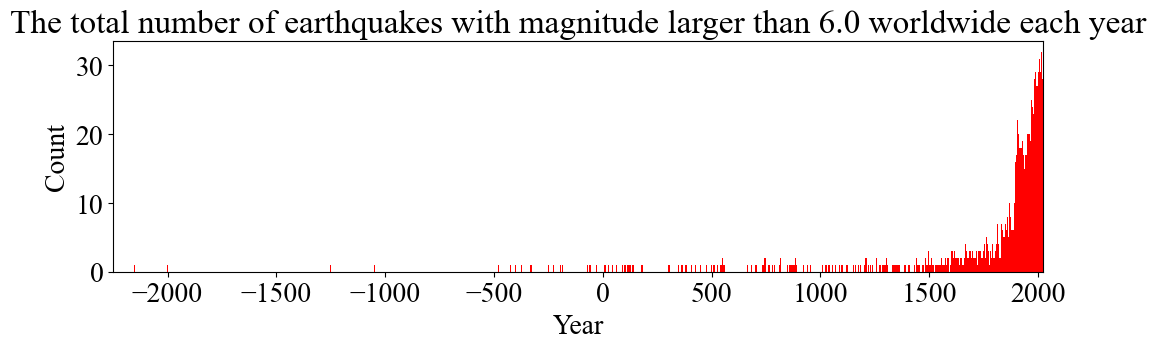

In [4]:
Sig_Eqs_2 = Sig_Eqs.loc[Sig_Eqs['Mag']>6.0].groupby(['Year']).count()['Mag']
plt.figure(2)
plt.figure(figsize=(12,3))
plt.bar(Sig_Eqs_2.index,Sig_Eqs_2,width=5,color='red')
plt.title(u'The total number of earthquakes with magnitude larger than 6.0 worldwide each year') #
plt.ylabel('Count') 
plt.xlabel('Year')
plt.xlim([min(Sig_Eqs_2.index)-100,max(Sig_Eqs_2.index)])

In [5]:
#Write a function CountEq_LargestEq that returns both (1) the total number of earthquakes since 2150 B.C. in a given country AND (2) the date of the largest earthquake ever happened in this country. Apply CountEq_LargestEq to every country in the file,
#  report your results in a descending order.

def CountEq_LargestEq(country):
    # 过滤给定国家的数据集
    country_data = Sig_Eqs[(Sig_Eqs['Country'] == country) & Sig_Eqs['Mag'].notna()]
    
    # 计算地震总数
    total_earthquakes = len(country_data)
    
    # 如果该国家有地震数据
    if not country_data.empty and country_data['Mag'].notnull().any():
        # 获取最大地震的日期（年、月、日）
        largest_eq_row = country_data.loc[country_data['Mag'].idxmax()]
        largest_eq_date = f"{largest_eq_row['Year']}-{largest_eq_row['Mo']}-{largest_eq_row['Dy']}"
    else:
        # 如果没有数据，返回一个默认值
        largest_eq_date = 'No Data'
    
    return total_earthquakes, largest_eq_date


# 创建一个结果字典
results = {}
for country in Sig_Eqs['Country'].unique():
    total_eq, largest_date = CountEq_LargestEq(country)
    results[country] = (total_eq, largest_date)

# 根据总地震数降序排序结果并报告
sorted_results = sorted(results.items(), key=lambda x: x[1][0], reverse=True)
for country, (total_eq, largest_date) in sorted_results:
    print(f"{country}: 总地震次数 = {total_eq}, 最大地震发生日期 = {largest_date}")



CHINA: 总地震次数 = 589, 最大地震发生日期 = 1668.0-7.0-25.0
JAPAN: 总地震次数 = 351, 最大地震发生日期 = 2011.0-3.0-11.0
INDONESIA: 总地震次数 = 331, 最大地震发生日期 = 2004.0-12.0-26.0
IRAN: 总地震次数 = 259, 最大地震发生日期 = 856.0-12.0-22.0
USA: 总地震次数 = 223, 最大地震发生日期 = 1964.0-3.0-28.0
TURKEY: 总地震次数 = 214, 最大地震发生日期 = 1939.0-12.0-26.0
GREECE: 总地震次数 = 155, 最大地震发生日期 = 365.0-7.0-21.0
PERU: 总地震次数 = 153, 最大地震发生日期 = 1716.0-2.0-6.0
CHILE: 总地震次数 = 146, 最大地震发生日期 = 1960.0-5.0-22.0
RUSSIA: 总地震次数 = 142, 最大地震发生日期 = 1952.0-11.0-4.0
PHILIPPINES: 总地震次数 = 136, 最大地震发生日期 = 1897.0-9.0-21.0
MEXICO: 总地震次数 = 125, 最大地震发生日期 = 1899.0-1.0-24.0
ITALY: 总地震次数 = 102, 最大地震发生日期 = 1915.0-1.0-13.0
TAIWAN: 总地震次数 = 97, 最大地震发生日期 = 1920.0-6.0-5.0
PAPUA NEW GUINEA: 总地震次数 = 93, 最大地震发生日期 = 1919.0-5.0-6.0
INDIA: 总地震次数 = 84, 最大地震发生日期 = 1950.0-8.0-15.0
COLOMBIA: 总地震次数 = 66, 最大地震发生日期 = 1826.0-6.0-18.0
NEW ZEALAND: 总地震次数 = 65, 最大地震发生日期 = 1826.0-nan-nan
SOLOMON ISLANDS: 总地震次数 = 61, 最大地震发生日期 = 1977.0-4.0-21.0
AFGHANISTAN: 总地震次数 = 60, 最大地震发生日期 = 1909.0-7.0-7.0
ECUADOR: 总地震次数 = 57, 最大地

### 代码结果正确，功能满足要求，分析内容合理，报告内容充实。
### 1.2中，注意在绘制6级以上的地震次数图件时，横坐标年份并不是均匀的，很多年份并没有发生6级以上的地震或并没有记录，图件容易有歧义。
### 助教提供给您提供了绘图的参考代码，给您参考。
### 得分：24/25
### --------------------------------------------------------------------------------------------

### PS2. Wind speed in Shenzhen during the past 10 years

C:\Users\Wu\AppData\Local\Temp\ipykernel_48148\375584633.py:10: DtypeWarning: Columns (4,8,9,12,15,21,22,24,26,31,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/2281305.csv', header=0)


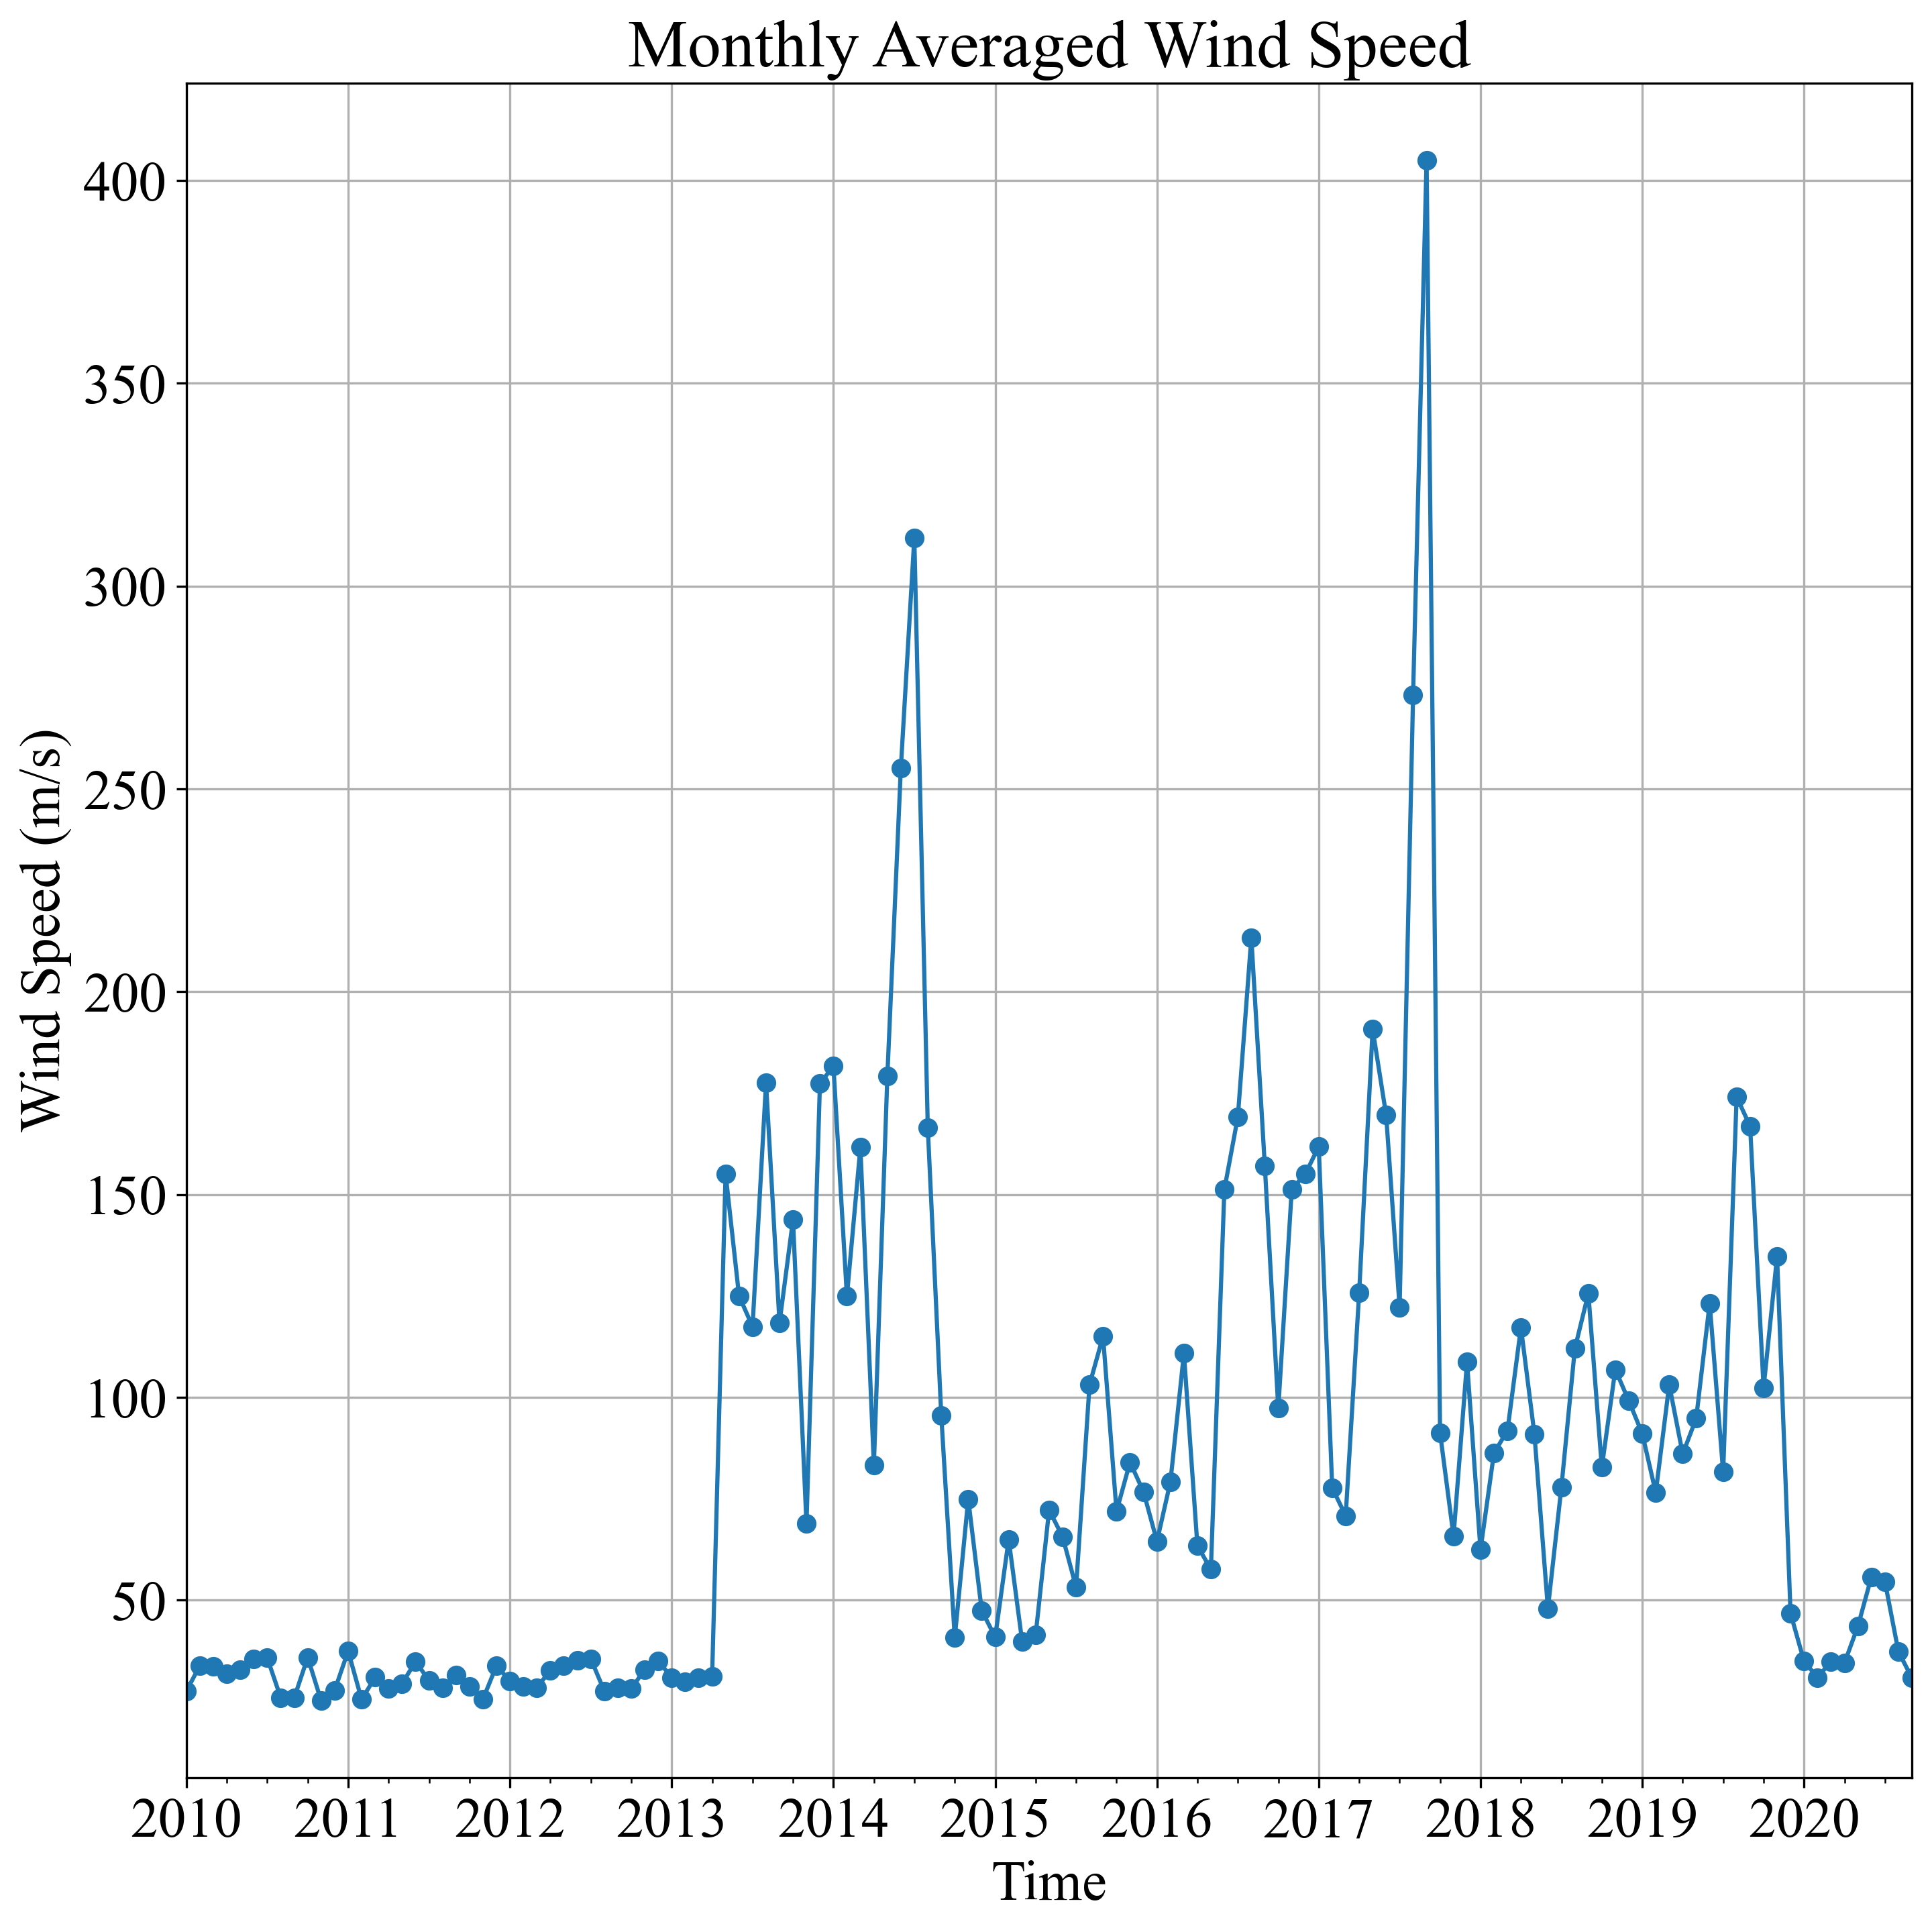

In [6]:
#In this problem set, we will examine how wind speed changes in Shenzhen during the past 10 years, we will take a look at the hourly weather data measured at the BaoAn International Airport. The data set is from NOAA Integrated Surface Dataset. Download the file 2281305.zip, where the number 2281305 is the site ID. Extract the zip file, you should see a file named 2281305.csv. Save the .csv file to your working directory.

# Read page 8-9 (POS 65-69 and POS 70-70) of the comprehensive user guide for the detailed format of the wind data. Explain how you filter the data in your report.

# [10 points] Plot monthly averaged wind speed as a function of the observation time. Is there a trend in monthly averaged wind speed within the past 10 years
import pandas as pd
import matplotlib.pyplot as plt

# Simulate the data
data = pd.read_csv('data/2281305.csv', header=0)

df = pd.DataFrame(data)

# Extract wind speed from 'WND' column (assuming it's the fourth value separated by commas)
df['Wind_Speed'] = df['WND'].str.split(',').str[3].astype(float)
# Convert 'DATE' to datetime type and set it as index
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)

# Resample data monthly and compute the average wind speed
monthly_avg_wind = df['Wind_Speed'].resample('M').mean()
plt.figure(figsize=(10,10),dpi=300)
# Plotting
monthly_avg_wind.plot(kind='line', marker='o')
plt.title("Monthly Averaged Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Time")
plt.tight_layout()
plt.grid(True)
plt.show()




In [18]:
# 以下是助教提供参考代码，来源：冯汇然同学

# Read the wind speed data into a DataFrame
Ws_SZ = pd.read_csv('data/2281305.csv',encoding='utf-8')

# Only choose 'DATE' and 'WND'
Ws_SZ = Ws_SZ[['DATE', 'WND']]

# Split 'WND' into 'direction_angle', 'direction_quality', 'type', 'speed' and 'speed_quality'
Ws_SZ[['direction_angle', 'direction_quality', 'type', 'speed', 'speed_quality']] = Ws_SZ['WND'].str.split(',', expand=True)

# Split 'DATE' into 'yyyymm' and 'ddHHMMSS'
Ws_SZ[['yyyy', 'mm', 'ddHHMMSS']] = Ws_SZ['DATE'].str.split('-', expand=True)

# yyyy + mm
Ws_SZ['yyyymm'] = Ws_SZ['yyyy'].astype(str) + '-' + Ws_SZ['mm'].astype(str)

# Show the Data Frame
# Ws_SZ

C:\Users\Wu\AppData\Local\Temp\ipykernel_48148\1191962281.py:4: DtypeWarning: Columns (4,8,9,12,15,21,22,24,26,31,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  Ws_SZ = pd.read_csv('data/2281305.csv',encoding='utf-8')


In [19]:
## Quality control

# 1. Drop direction_angle == 999
Ws_SZ = Ws_SZ[Ws_SZ['direction_angle'] != '999']

# 2. Drop direction_quality in [2,3,6,7]
Ws_SZ = Ws_SZ[~Ws_SZ['direction_quality'].isin(['2', '3', '6', '7'])]

# 3. Drop type == 9
Ws_SZ = Ws_SZ[Ws_SZ['type'] != '9']

# 4. Drop speed == 9999
Ws_SZ = Ws_SZ[Ws_SZ['speed'] != '999.9']
Ws_SZ['speed'] = (Ws_SZ['speed'].astype(float))/10

# 5. Drop speed_quality in [2,3,6,7]
Ws_SZ = Ws_SZ[~Ws_SZ['speed_quality'].isin(['2', '3', '6', '7'])]

## Show
# Ws_SZ

<Axes: title={'center': 'Monthly Wind Speed in ShenZhen Site'}, xlabel='Month', ylabel='Wind Speed (m/s)'>

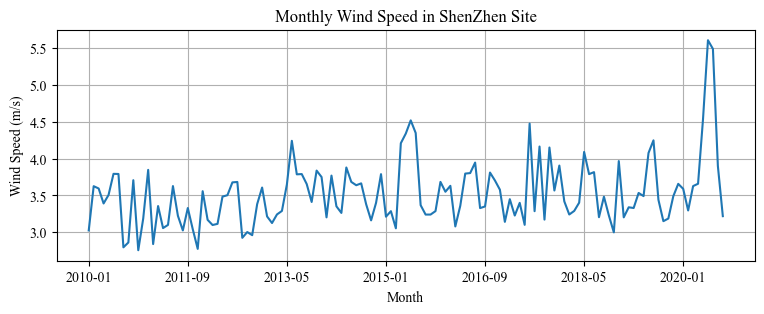

In [20]:
# Plot
Ws_SZ.groupby('yyyymm')['speed'].mean().plot(figsize=(9,3),
                                             title='Monthly Wind Speed in ShenZhen Site',
                                             ylabel='Wind Speed (m/s)',
                                             xlabel='Month',
                                             grid=True)

### 数据预处理有误，并且存在未剔除的值。导致在计算月平均风速时，存在理论与事实上并不可能存在的数值。
### 比如400m/s月平均风速，[龙卷风摧毁停车场]。
### 助教提供参考代码，来源：冯汇然同学
### 得分 9/10
### ---------------------------------------------------------------------------------------------

### PS3. Explore a data set

In [10]:
beijingdata=pd.read_csv('data/Beijing.csv',header=0,sep=',')
beijingdata=beijingdata.drop(labels=['SNOW','SNWD (Inches)'],axis=1)
beijingdata.dropna(axis=0,how='any',inplace=True)
beijingdata['Date']=pd.to_datetime(beijingdata['Date'])
beijingdata.set_index('Date',inplace=True)

In [11]:
beijingdata

,TAVG (Degrees Fahrenheit),TMAX (Degrees Fahrenheit),TMIN (Degrees Fahrenheit),PRCP (Inches)
Date,,,,
1951-01-02,20.0,30.0,14.0,0.02
1951-01-03,18.0,25.0,11.0,0.00
1951-01-04,19.0,23.0,14.0,0.05
1951-01-05,16.0,20.0,13.0,0.18
1951-01-06,17.0,20.0,14.0,0.00
...,...,...,...,...
2023-09-09,68.0,82.0,67.0,2.24
2023-09-28,64.0,83.0,51.0,0.00
2023-10-01,62.0,79.0,48.0,0.00


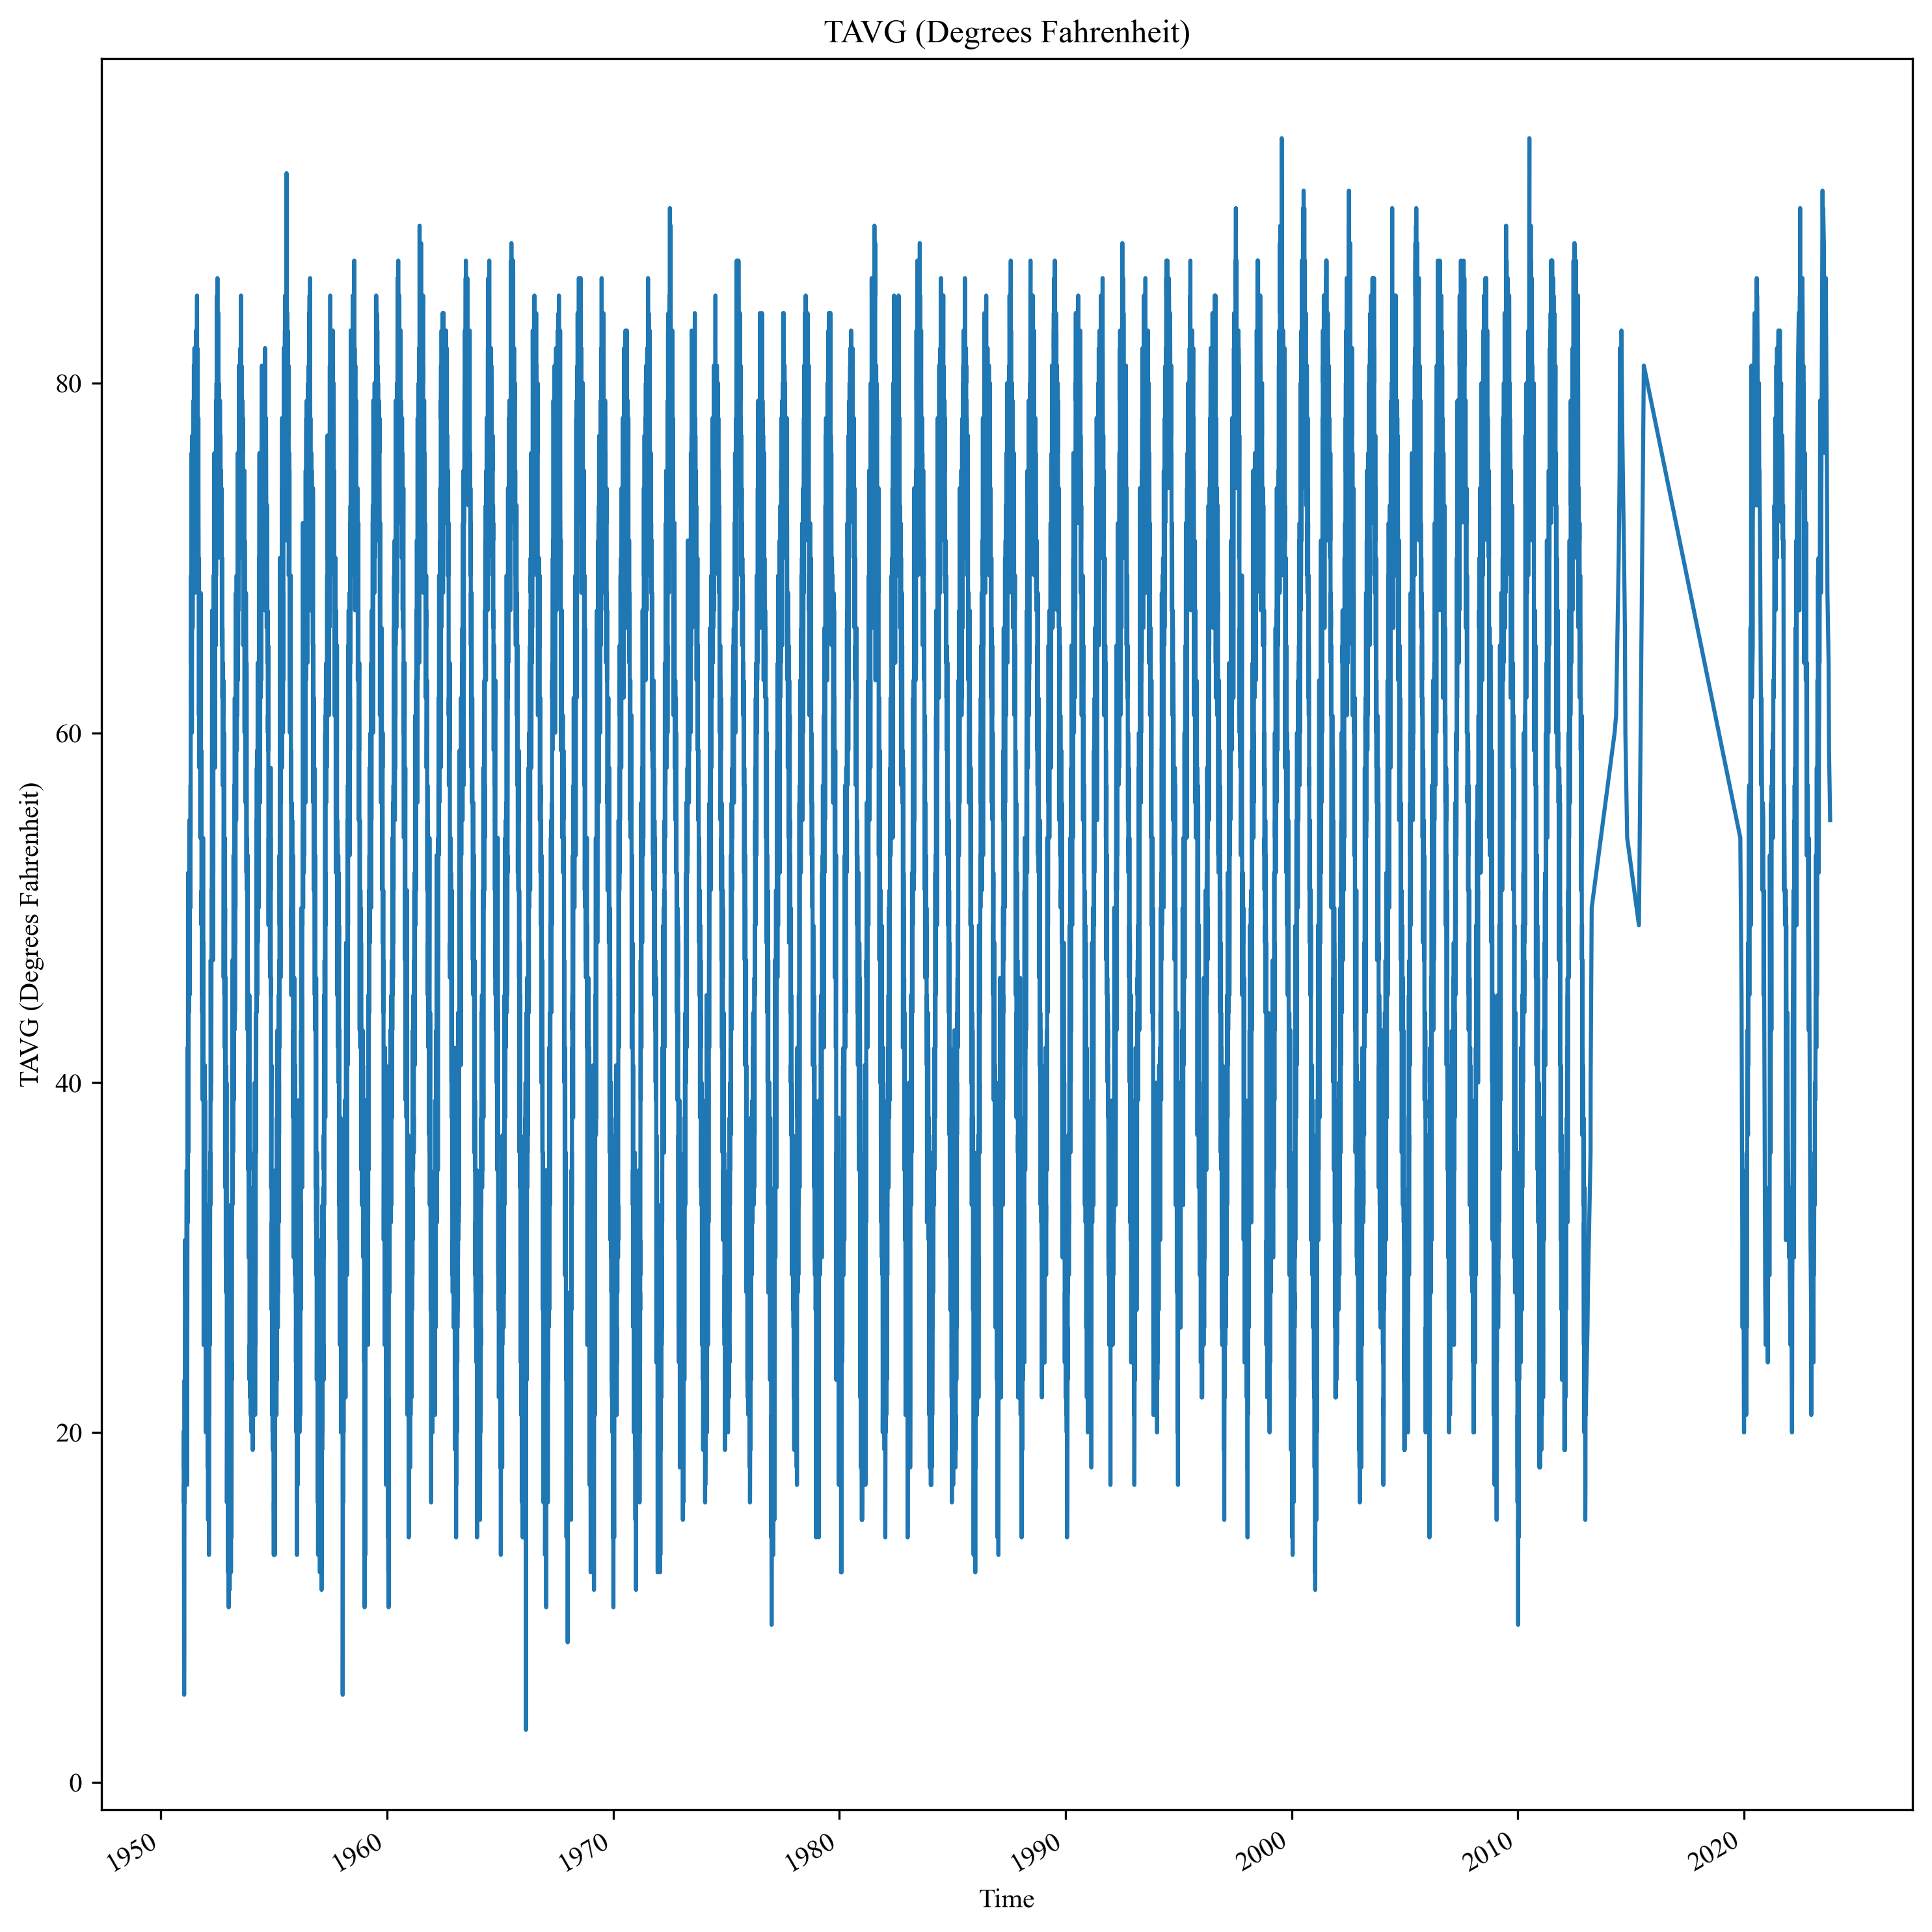

In [12]:

plt.figure(figsize=(10,10),dpi=300)
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 10
beijingdata['TAVG (Degrees Fahrenheit)'].plot()
plt.title('TAVG (Degrees Fahrenheit)')
plt.xlabel('Time')
plt.ylabel('TAVG (Degrees Fahrenheit)')
plt.tight_layout()
plt.show()

In [13]:
summary = beijingdata.describe()
print(summary)

       TAVG (Degrees Fahrenheit)  TMAX (Degrees Fahrenheit)  \
count               22988.000000               22988.000000   
mean                   54.126327                  64.385070   
std                    20.166218                  20.559877   
min                     3.000000                   9.000000   
25%                    35.000000                  46.000000   
50%                    57.000000                  68.000000   
75%                    73.000000                  83.000000   
max                    94.000000                 107.000000   

       TMIN (Degrees Fahrenheit)  PRCP (Inches)  
count               22988.000000    22988.00000  
mean                   44.940230        0.06466  
std                    20.106953        0.30949  
min                   -17.000000        0.00000  
25%                    27.000000        0.00000  
50%                    46.000000        0.00000  
75%                    63.000000        0.00000  
max                    85.000000

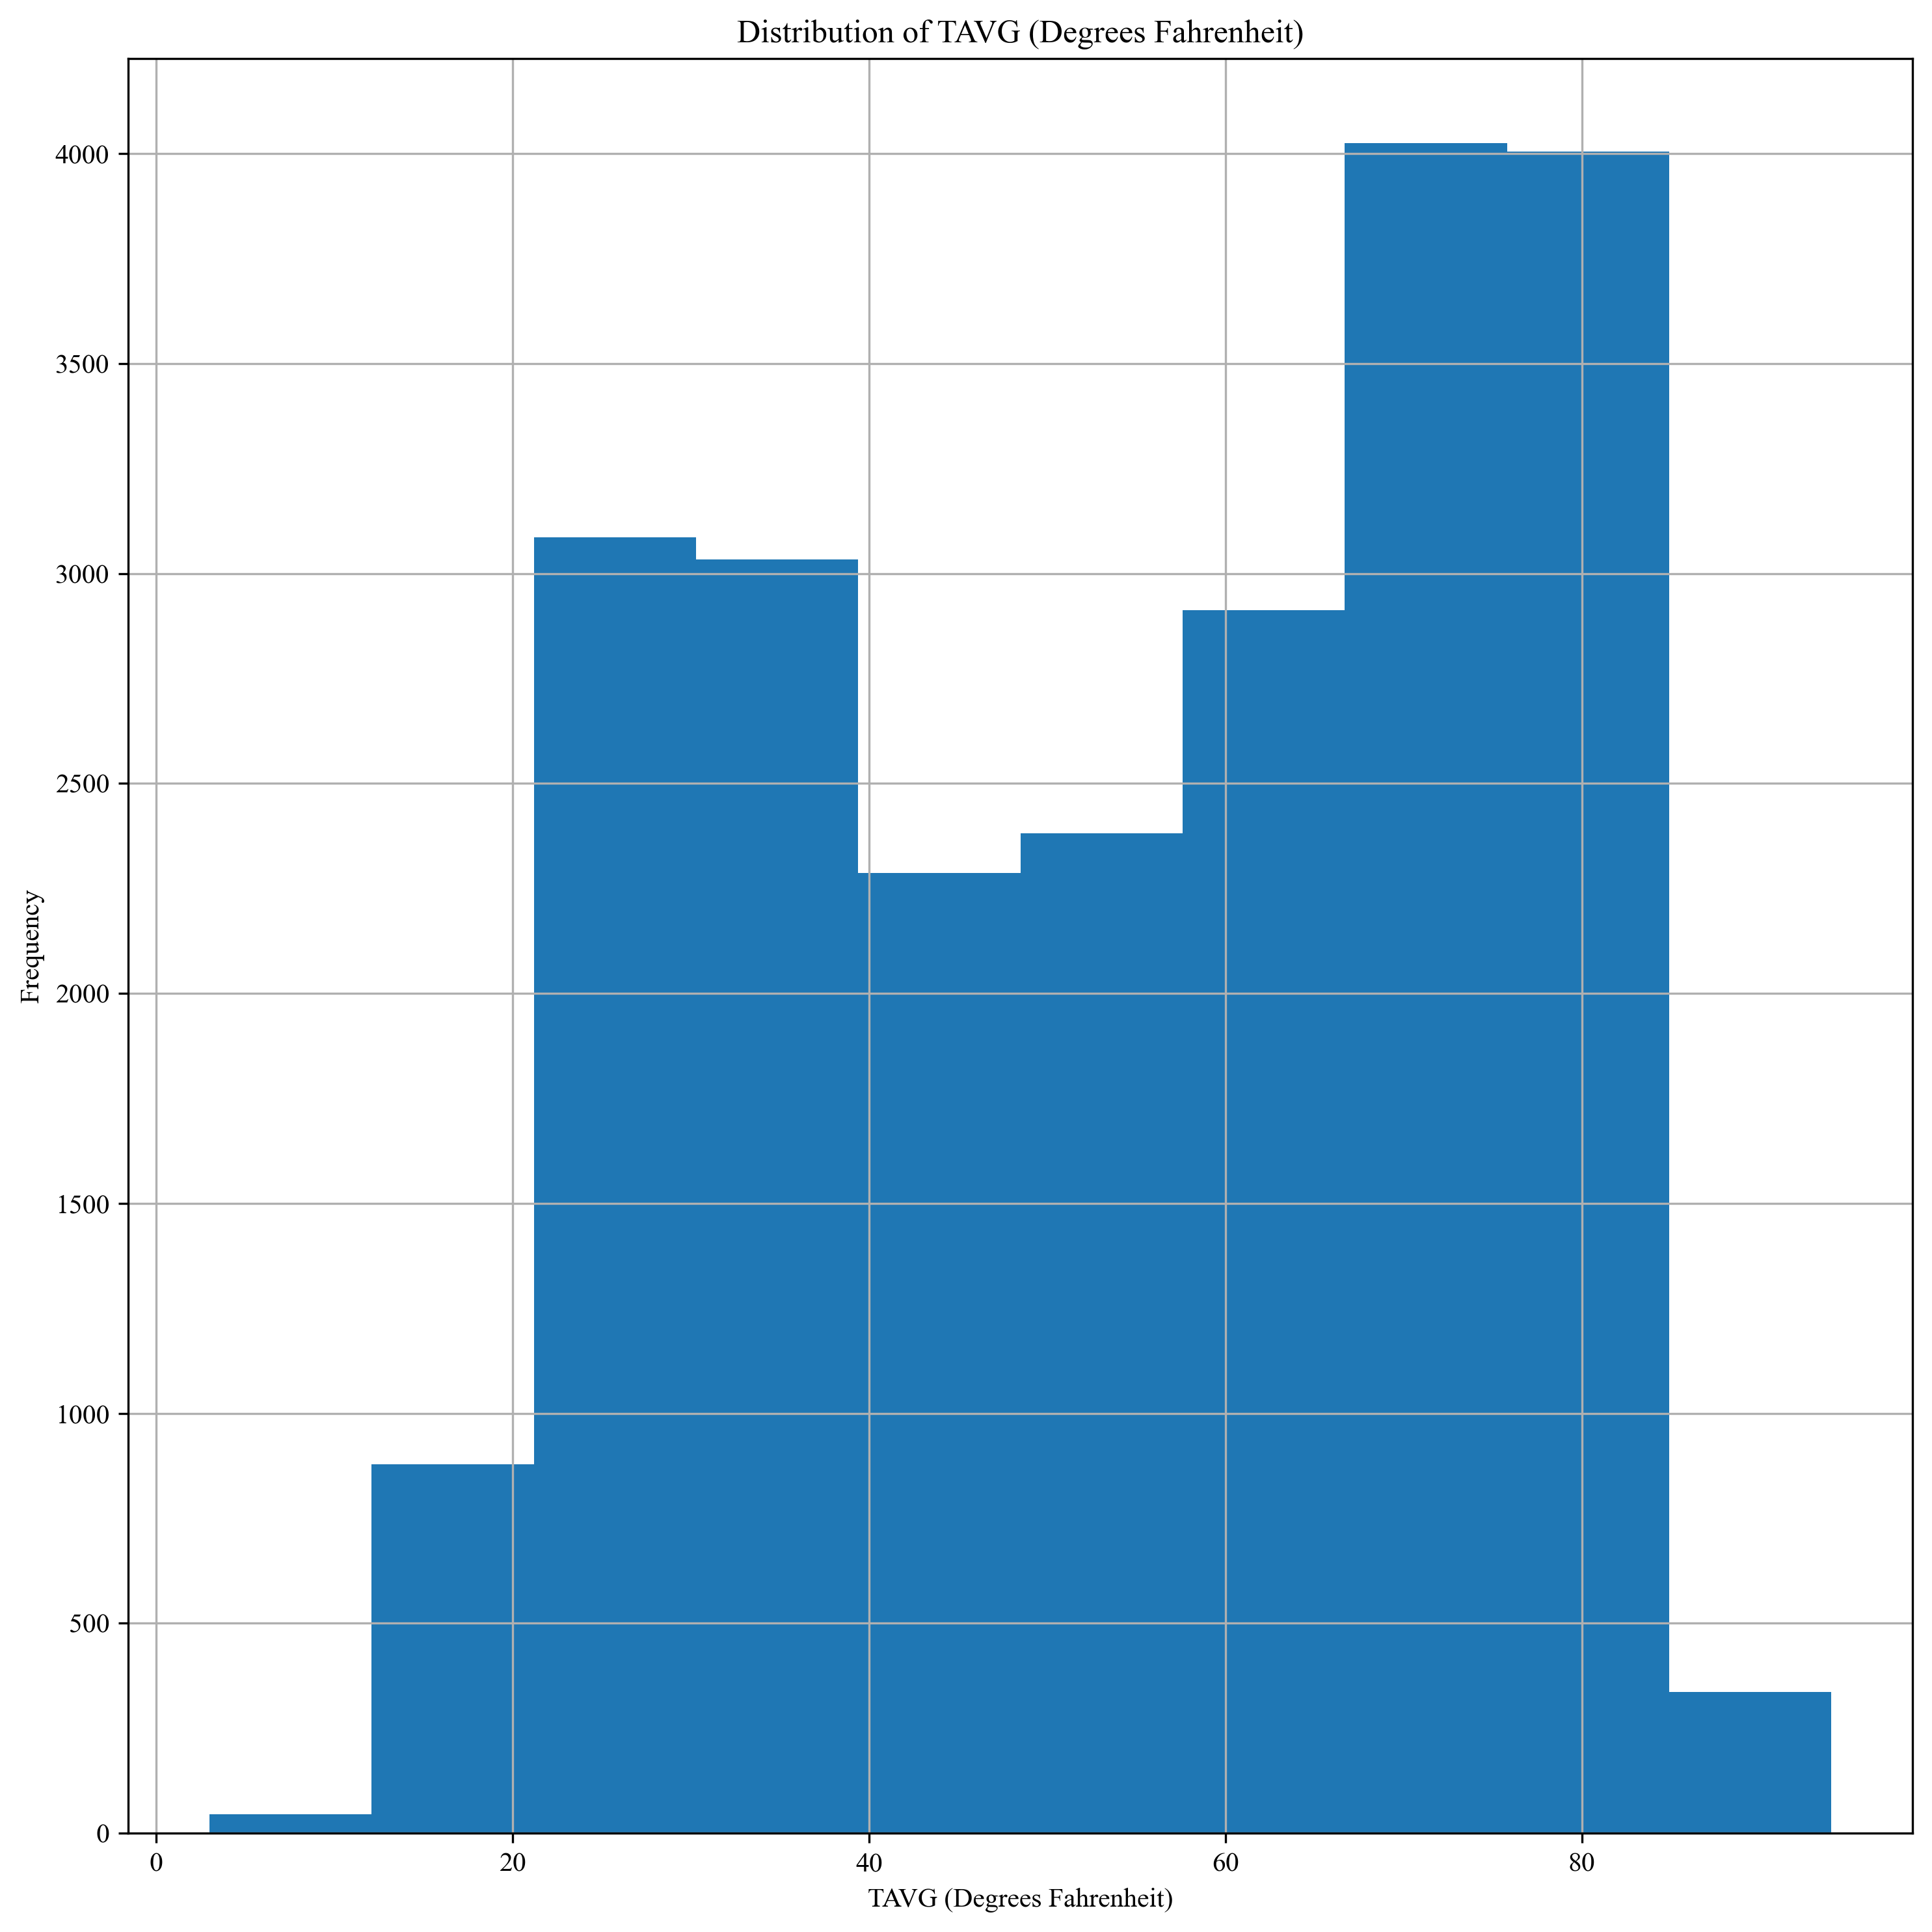

In [14]:
plt.figure(figsize=(10,10),dpi=300)
variable = 'TAVG (Degrees Fahrenheit)'  # Replace with your column name
histogram = beijingdata[variable].hist()
plt.title(f'Distribution of {variable}')
plt.xlabel(variable)
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


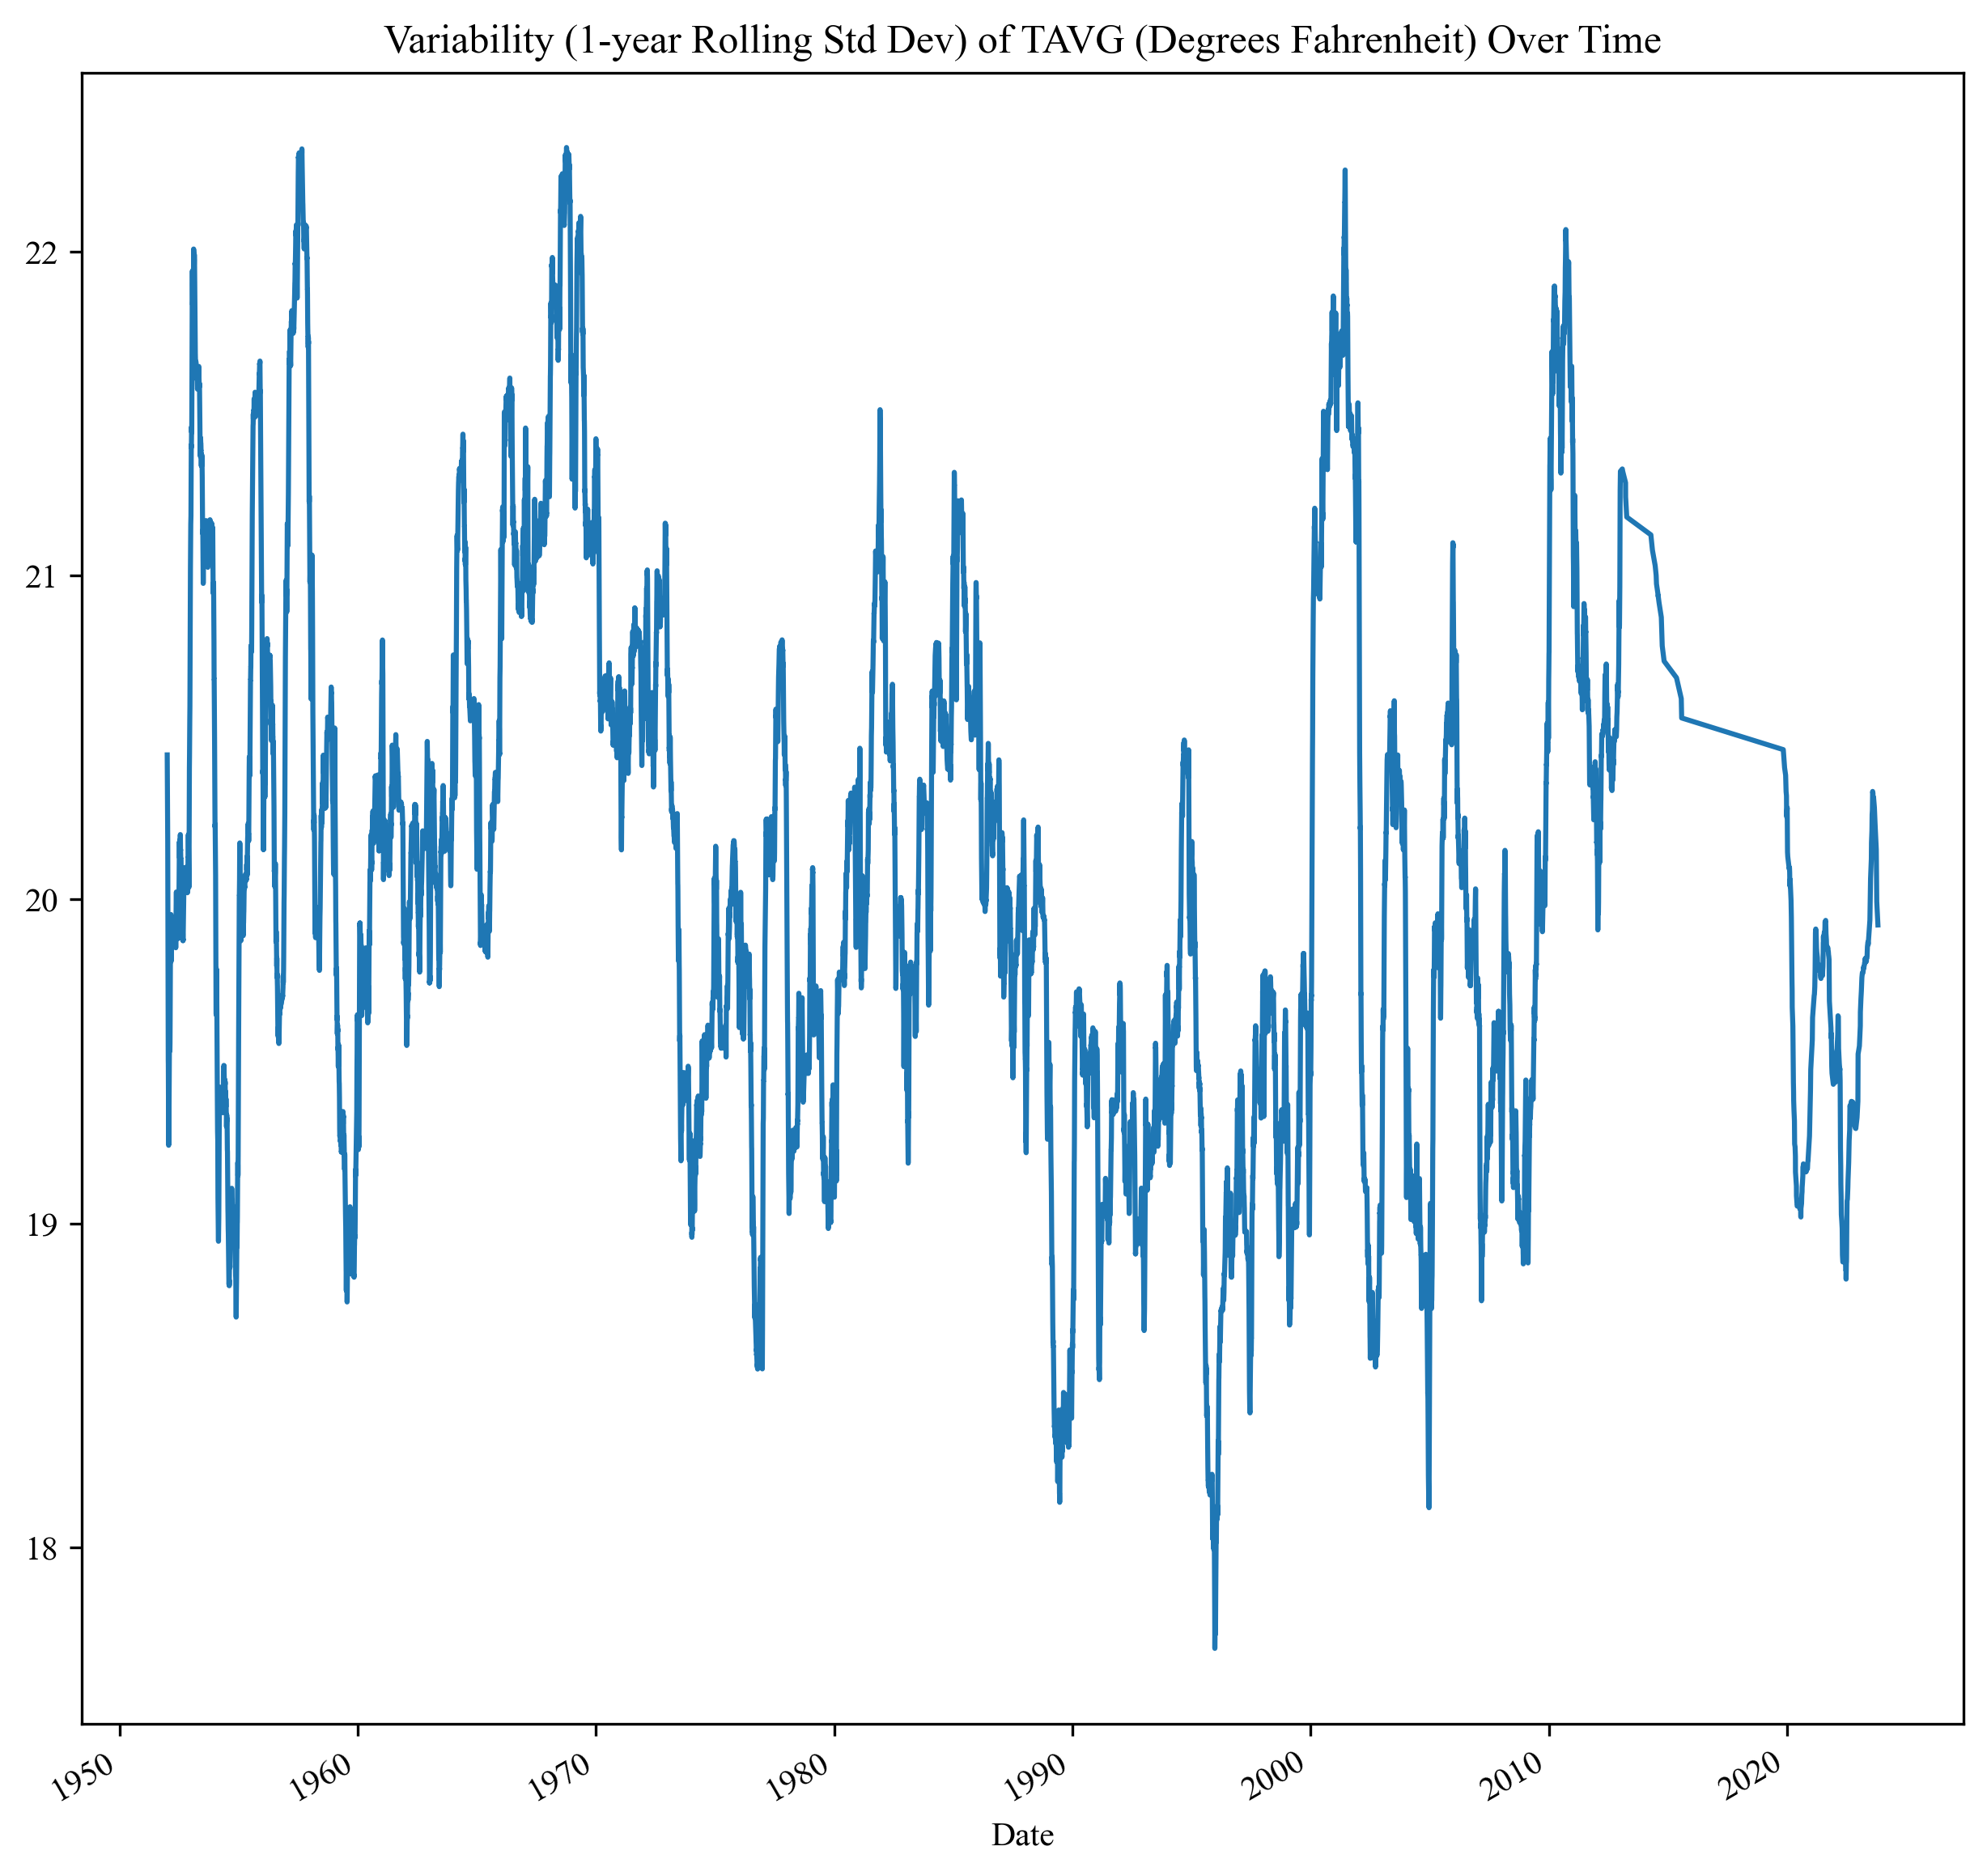

In [15]:

plt.figure(figsize=(10,10),dpi=300)
variable = 'TAVG (Degrees Fahrenheit)'  
rolling_std = beijingdata[variable].rolling(window=365).std()
rolling_std.plot()

plt.title(f'Variability (1-year Rolling Std Dev) of {variable} Over Time')
plt.show()


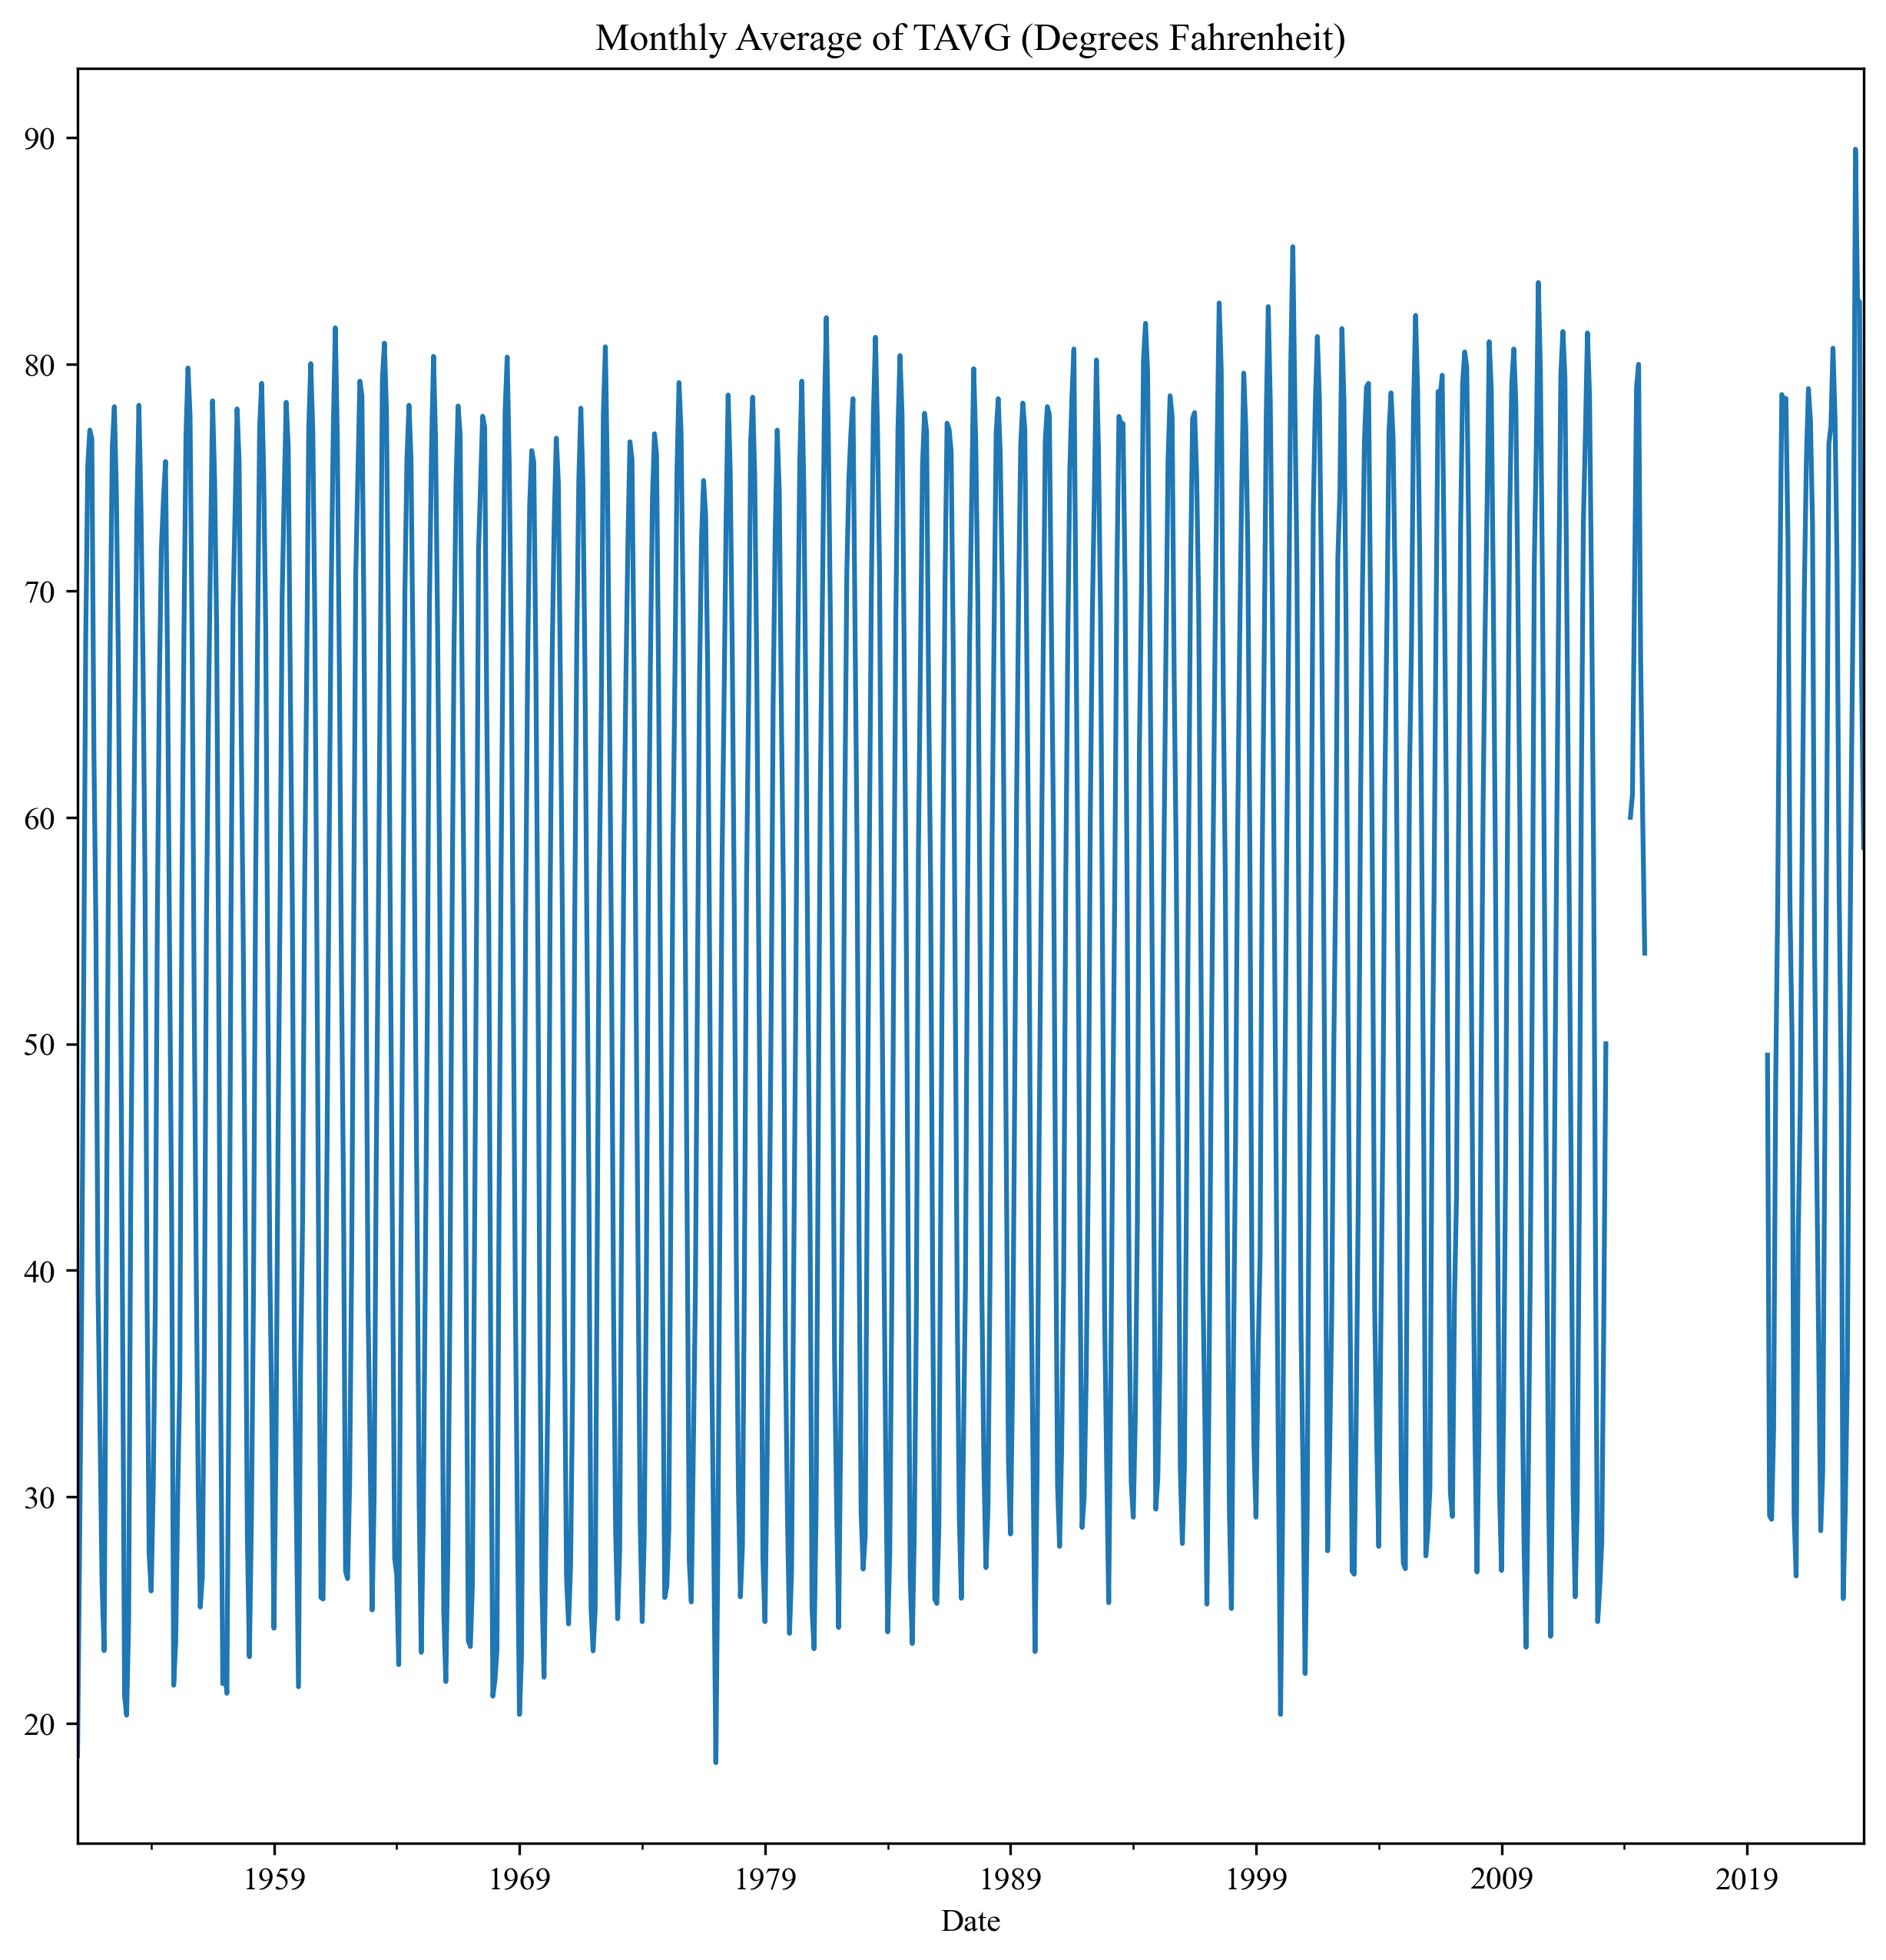

In [16]:
plt.figure(figsize=(10,10),dpi=300)
variable = 'TAVG (Degrees Fahrenheit)'  
monthly_avg = beijingdata[variable].resample('M').mean()
monthly_avg.plot()
plt.title(f'Monthly Average of {variable}')
plt.show()


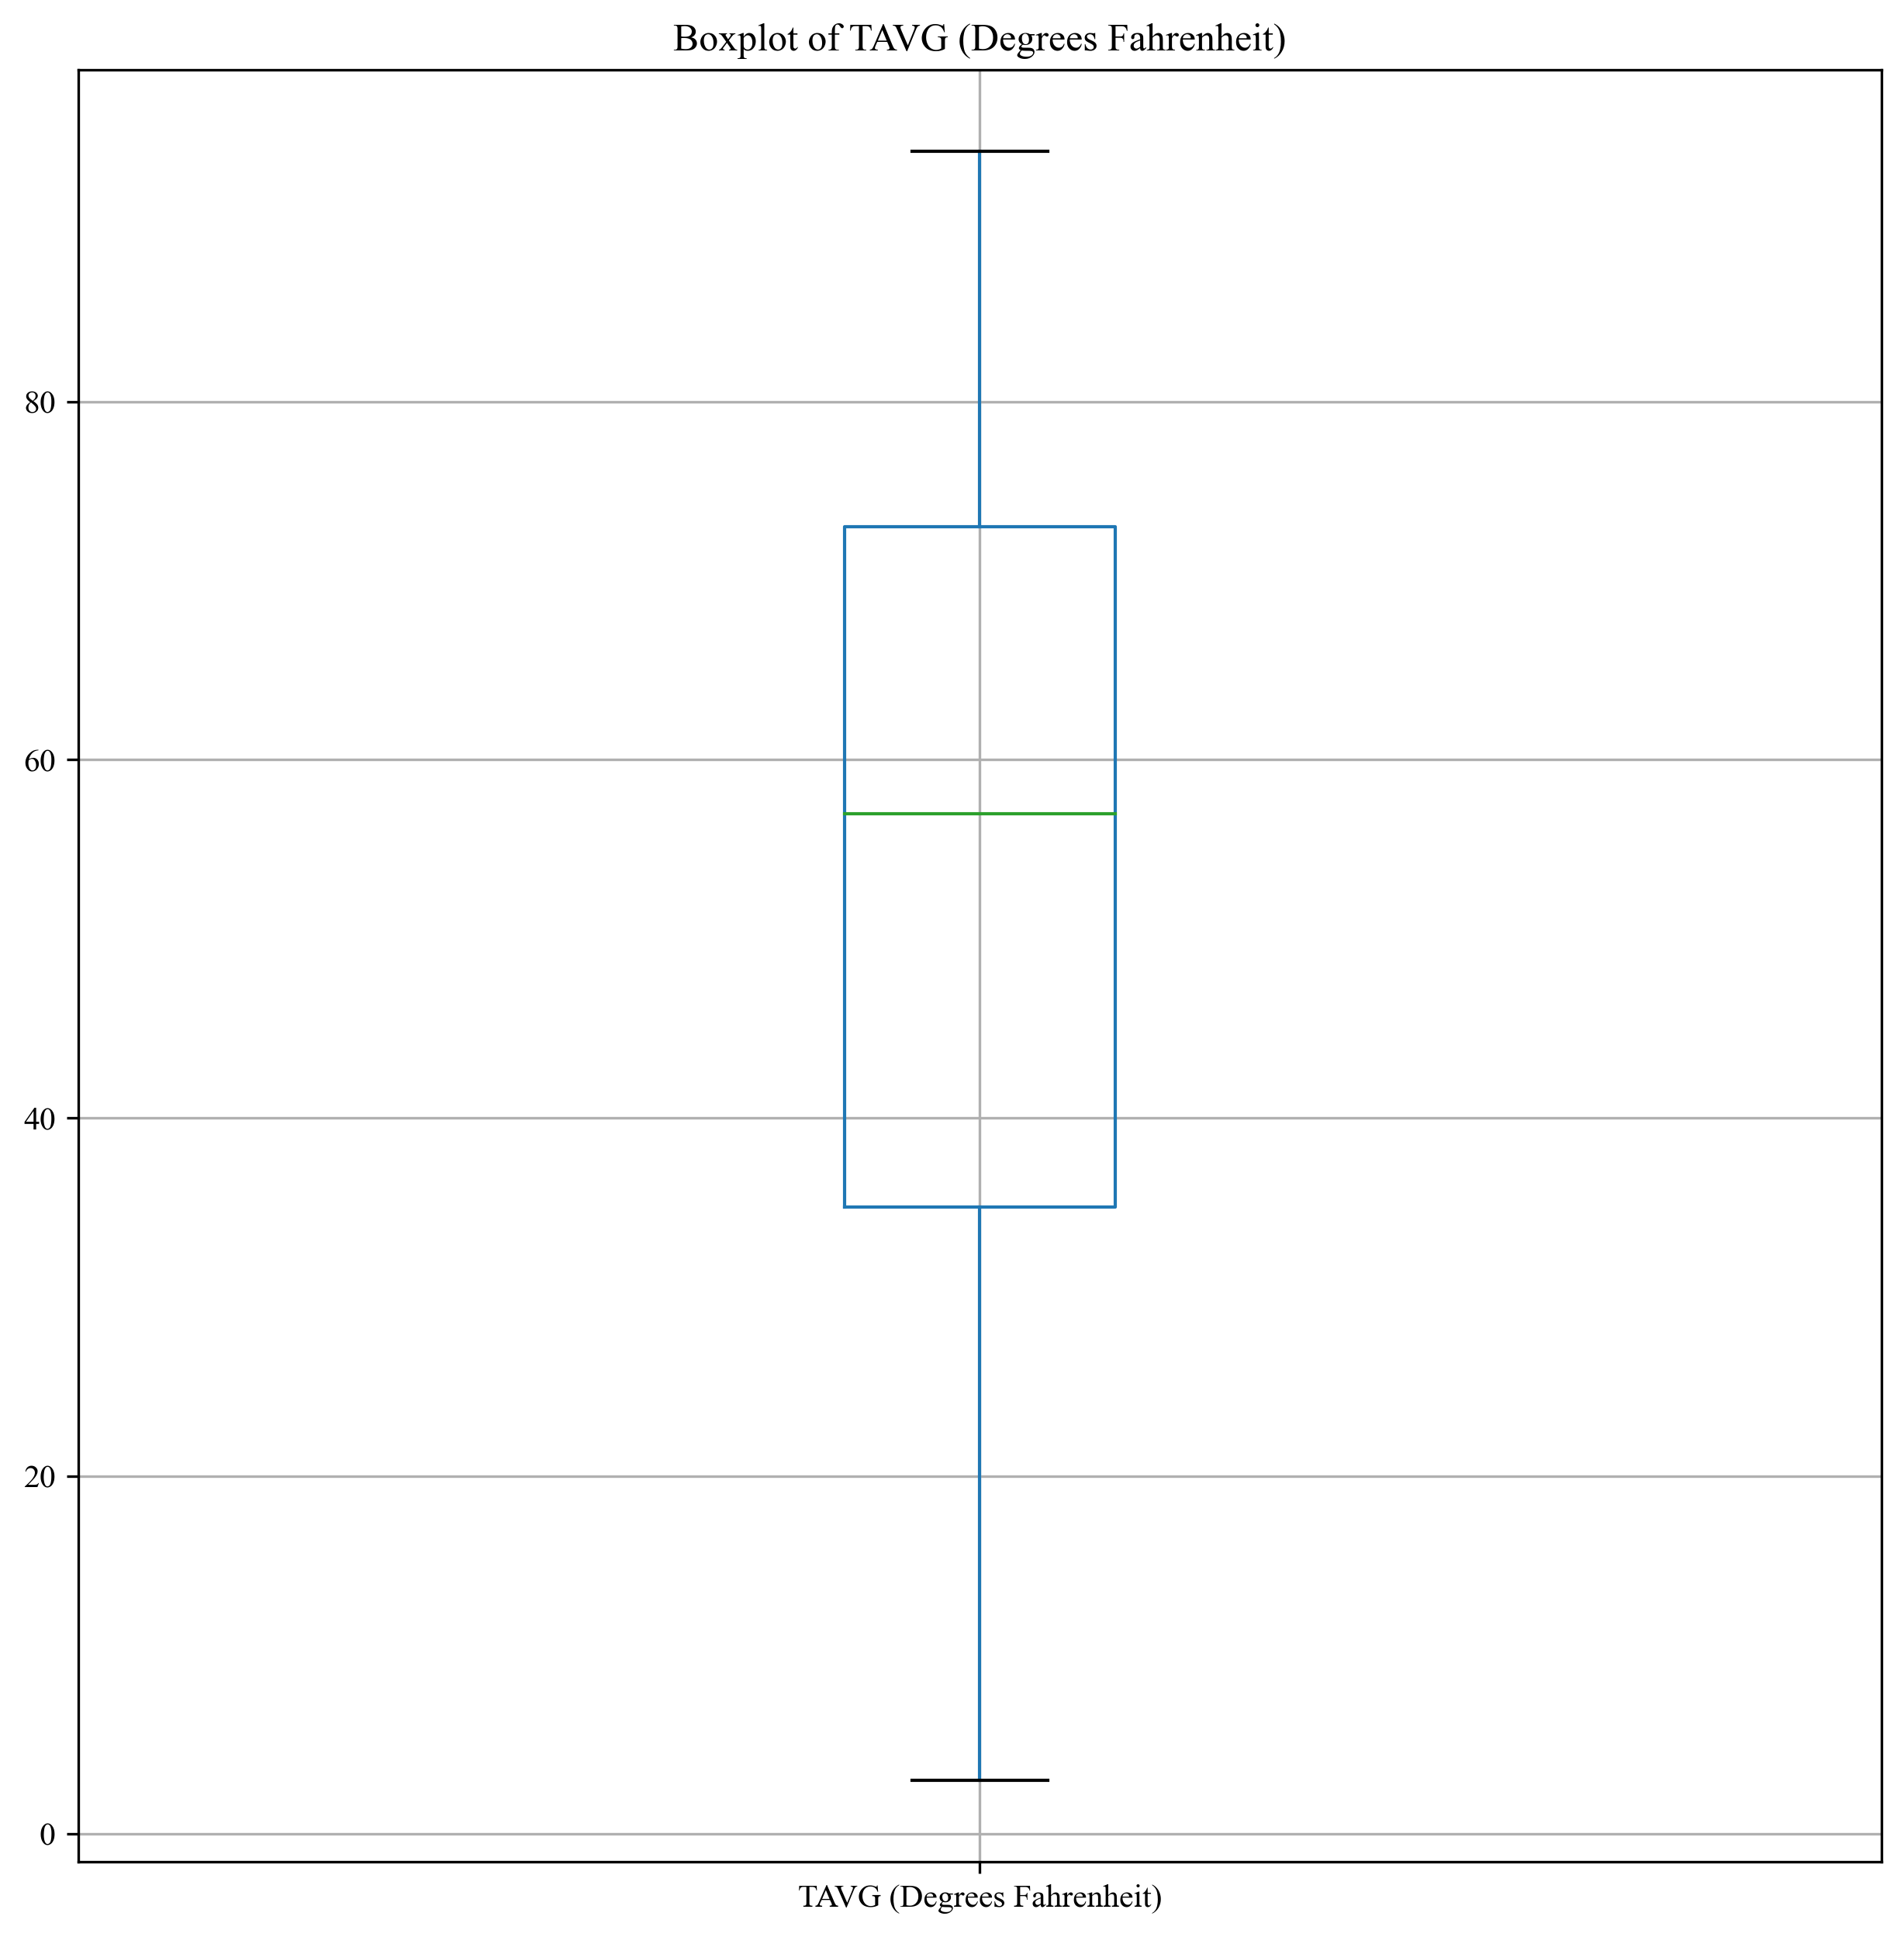

In [17]:
plt.figure(figsize=(10,10),dpi=300)
variable = 'TAVG (Degrees Fahrenheit)'  
boxplot = beijingdata.boxplot(column=[variable])
plt.title(f'Boxplot of {variable}')
plt.show()


### 代码运行结果正确，数据预处理正确，绘制图件正确，统计检查正确。报告内容充实。
### 得分 16/15
### ---------------------------------------------------------------------------------------------